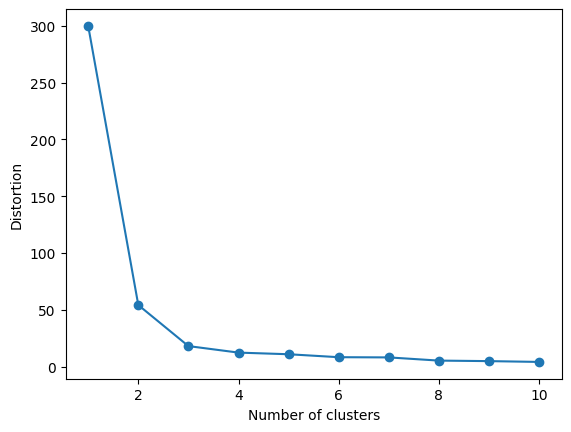

In [2]:
# Week10 
# Question 1 (c)
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
# We only use the "petal width" & "petal length" columns
iris_data_wl = pd.DataFrame(data=iris.data, columns=iris.feature_names)[['petal width (cm)','petal length (cm)']]

# Scale the length and width
scaler = StandardScaler()
x_scaled = scaler.fit_transform(iris_data_wl)

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init='auto', random_state=0)
    kmeans.fit(x_scaled)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

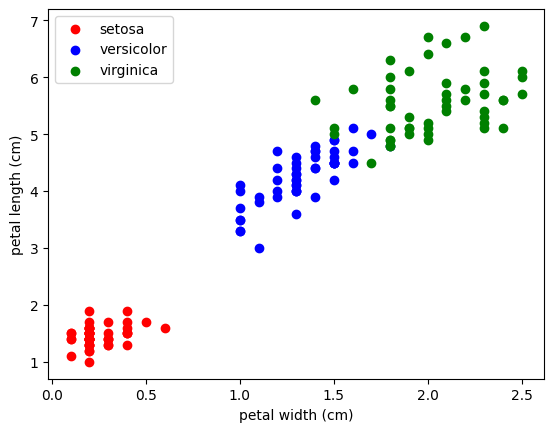

In [3]:
# Question 1 (d)

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Our previous iris_data did not contain class, so let's add it 
iris_data_wl['class'] = iris.target

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each class with a different color
for label, color in zip(range(3), ['red', 'blue', 'green']):
    mask = (iris_data_wl['class'] == label)
    ax.scatter(iris_data_wl.loc[mask, 'petal width (cm)'], iris_data_wl.loc[mask, 'petal length (cm)'], 
               c=color, label=iris.target_names[label])

# Add axis labels and legend
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.legend()

# Show the plot
plt.show()

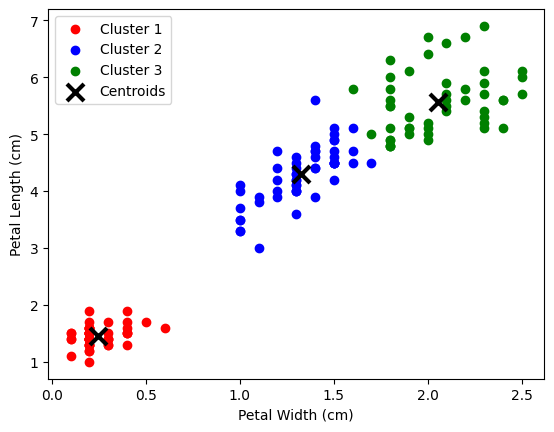

In [4]:
# Question 1 (e)

kmeans = KMeans(n_clusters=3,n_init=20, max_iter=300, init='k-means++')
# Notice here the kmeans is fitted using the scaled petal width and length
kmeans.fit(x_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Since the kmeans is fitted on the scalled value, but we normally want to show how the cluster is formed
# under the regular scale of the petal width and length, so the centroids of the plot need to be inverse scaled to the
# original scale/value
origin_centroids = scaler.inverse_transform(centroids)

# Visualize the resulting clusters with centroids
fig, ax = plt.subplots()

for label, color in zip(range(3), ['red', 'blue', 'green']):
    mask = (labels == label)
    ax.scatter(iris_data_wl.loc[mask, 'petal width (cm)'], iris_data_wl.loc[mask, 'petal length (cm)'], 
               c=color, label=f'Cluster {label+1}')

ax.scatter(origin_centroids[:, 0], origin_centroids[:, 1], s=150, marker='x', linewidths=3, color='black', label='Centroids')

ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.legend()

plt.show()